<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab 3_01: Statistical Modeling and Model Validation

> Authors: Tim Book, Matt Brems

---

## Objective
The goal of this lab is to guide you through the modeling workflow to produce the best model you can. In this lesson, you will follow all best practices when slicing your data and validating your model. 

You will be predicting `tripduration`.
Take note the trip duration was recorded in seconds.

## Imports

In [1]:
# Import everything you need here.
# You may want to return to this cell to import more things later in the lab.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important!

import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import seaborn               as sns
import matplotlib.pyplot     as plt

import statsmodels.api as sm
from matplotlib.cbook import boxplot_stats  

%matplotlib inline

## Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [2]:
# Read in the citibike data in the data folder in this repository.
citibike = pd.read_csv('../03_01-lab-regression-and-model-validation/data/citibike_feb2014.csv')

## Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

You should minimally check for:
* Is there missing data?
* Is there duplicated data entries?
* Is there odd data value (e.g. Negative Age value)?
* Is the data type appropriate?

### Data Inspection
1. Print first 5 rows
2. Check datatypes
3. Check summary statistics, to check for max and min values
4. Check for missing values
5. Check for duplicate values
6. Check value counts for usertype
7. Check unique values for birthyear
8. Check value counts for gender

In [3]:
# Print first 5 rows
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


In [4]:
#Check datatypes 
citibike.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                  object
gender                       int64
dtype: object

In [5]:
# Print summary statistics, check max and min values
citibike.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000
mean,874.519810,439.203479,40.734366,-73.990386,440.741995,40.734221,-73.990521,18010.598222,1.154617
std,5486.092219,335.723861,0.019031,0.011853,341.497433,0.019048,0.011920,1987.769335,0.436592
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,0.000000
25%,360.000000,305.000000,40.721854,-73.998522,305.000000,40.721816,-73.999061,16302.000000,1.000000
50%,544.000000,403.000000,40.736197,-73.990617,403.000000,40.735877,-73.990741,17975.000000,1.000000
75%,845.000000,490.000000,40.749156,-73.981918,488.000000,40.749013,-73.981948,19689.000000,1.000000
max,766108.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,21542.000000,2.000000


In [6]:
#Check if data is empty & address them appropriately
citibike.isna().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [7]:
#check if there is duplicated data & address them appropriately
citibike.duplicated().sum()

0

In [8]:
# Check value counts for usertype
citibike['usertype'].value_counts()

usertype
Subscriber    218019
Customer        6717
Name: count, dtype: int64

In [9]:
# Birth year has an erroreous value
citibike['birth year'].unique()

array(['1991', '1979', '1948', '1981', '1990', '1978', '1944', '1983',
       '1969', '1986', '1962', '1965', '1942', '1989', '1980', '1957',
       '1951', '1992', '1971', '1982', '1968', '1984', '\\N', '1956',
       '1987', '1985', '1996', '1975', '1988', '1974', '1972', '1959',
       '1973', '1977', '1976', '1953', '1993', '1970', '1963', '1967',
       '1966', '1960', '1961', '1994', '1958', '1955', '1946', '1964',
       '1900', '1995', '1954', '1952', '1949', '1947', '1941', '1938',
       '1950', '1945', '1997', '1934', '1940', '1939', '1936', '1943',
       '1935', '1937', '1922', '1932', '1907', '1926', '1899', '1901',
       '1917', '1910', '1933', '1921', '1927', '1913'], dtype=object)

In [10]:
# Check how many rows have gender value of 0
citibike['gender'].value_counts()

gender
1    176526
2     41479
0      6731
Name: count, dtype: int64

### Summary for data inspection
1. There are no missing values
2. There are no duplicates
3. Just by looking at the mean and std of tripduration, and comparing with the max value, we can see that there are outliers
4. Starttime, stoptime should be converted to datetime
5. Start station id, end station id, bikeid should ideally be dummified for downstream modelling
6. Gender appears to have 3 values, (0,1 and 2). Is this normal in America?
7. Birthyear should be recast as integer, after cleaning

### Data Cleaning

1. Convert startime and stoptime to datetime64 format, but this seems unnecessary for this lab
2. Map errorneous value in 'birth year' to nan
3. Check % of nan values, so can determine if we can drop them. Slightly less than 3% of our data.
4. Drop rows with nan values since missing values are less than 5% of our data
5. Check how many rows have gender == 0. Just 14.
6. Drop rows where gender == 0

In [11]:
# Convert 'starttime' and 'stoptime' to_datetime
citibike['starttime'] = pd.to_datetime(citibike['starttime'],
                                       infer_datetime_format = True,
                                      )
citibike['stoptime'] = pd.to_datetime(citibike['stoptime'],
                                       infer_datetime_format = True,
                                      )

C:\Users\Wes\AppData\Local\Temp\ipykernel_54732\2793335473.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  citibike['starttime'] = pd.to_datetime(citibike['starttime'],
C:\Users\Wes\AppData\Local\Temp\ipykernel_54732\2793335473.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  citibike['stoptime'] = pd.to_datetime(citibike['stoptime'],


In [12]:
# Map errorneous value to np.nan, non-errorneous values can recast as integer
citibike['birth year'] = citibike['birth year'].map(lambda year: np.nan if year == '\\N' else int(year))

In [13]:
# How many nan values did we create in birth year?
print(citibike.isna().sum() , '\n')
# How many rows do we have in our dataframe
print(citibike.shape, '\n')
# Print % of nan values relative to total horizontal shape of dataframe
print(f'{citibike.isna().sum().sum() *100 / citibike.shape[0]}% of data has an NaN value')

tripduration                  0
starttime                     0
stoptime                      0
start station id              0
start station name            0
start station latitude        0
start station longitude       0
end station id                0
end station name              0
end station latitude          0
end station longitude         0
bikeid                        0
usertype                      0
birth year                 6717
gender                        0
dtype: int64 

(224736, 15) 

2.988840239214011% of data has an NaN value


In [14]:
# Drop NaN values since it makes up less than 5% of our data
citibike.dropna(inplace=True)

In [15]:
# Drop rows with gender == 0
citibike.drop(index=citibike[citibike['gender'] == 0].index, inplace=True)

### Additional lab question requirements

In [16]:
#Check non-numerical columns data:
citibike.select_dtypes(include=['object','datetime64[ns]']).head()

,starttime,stoptime,start station name,end station name,usertype
0,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,Stanton St & Chrystie St,Subscriber
1,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,E 4 St & 2 Ave,Subscriber
2,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,Mott St & Prince St,Subscriber
3,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,Greenwich Ave & 8 Ave,Subscriber
4,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,E 4 St & 2 Ave,Subscriber


In [17]:
# Check numerical data values (excluding ID columns):
numeric_not_id = ['tripduration','start station latitude',
       'start station longitude','end station latitude',
       'end station longitude', 'gender']
citibike._get_numeric_data().loc[:, numeric_not_id].head()

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,gender
0,382,40.730494,-73.995721,40.722293,-73.991475,1
1,372,40.734546,-73.990741,40.726281,-73.989780,2
2,591,40.735354,-74.004831,40.723180,-73.994800,2
3,583,40.732618,-73.991580,40.739017,-74.002638,1
4,223,40.720196,-73.989978,40.726281,-73.989780,1


Text(0.5, 1.0, 'Boxplot of tripduration')

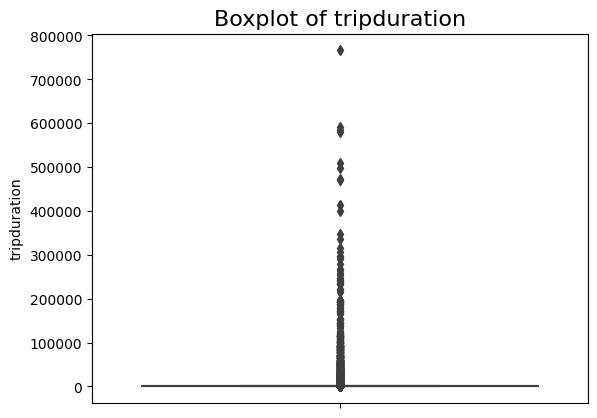

In [18]:
# Examine 'tripduration' - are there outliers?
sns.boxplot(data=citibike, y='tripduration')
plt.title('Boxplot of tripduration',fontsize=16)

In [19]:
# Number of outliers in tripduration
len(boxplot_stats(citibike["tripduration"])[0]['fliers'])

13738

In [20]:
# Calculate % of outliers in tripduration
print(f"{100 * len(boxplot_stats(citibike['tripduration'])[0]['fliers'])/citibike.shape[0]}% of tripduration are outliers")

6.301690328203482% of tripduration are outliers


Text(0.5, 1.0, 'Boxplot of tripduration(log)')

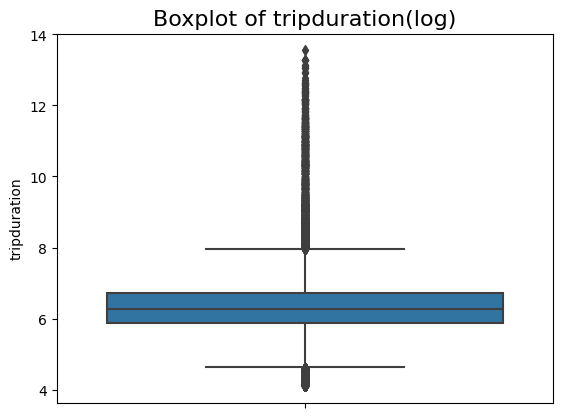

In [21]:
# We can convert trip duration to log to 'squeeze' the values within the range of the axis
sns.boxplot( y=np.log(citibike['tripduration']))
plt.title('Boxplot of tripduration(log)',fontsize=16)

## Is average trip duration different by gender?

Conduct a hypothesis test that checks whether or not the average trip duration is different for `gender=1` and `gender=2`. Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly!

$$
\begin{eqnarray*}
&H_0:& \mu_1 = \mu_2 \\
&H_A:& \mu_1 \neq \mu_2
\end{eqnarray*}
$$

We will conduct this test assuming $\alpha=0.05$.

### Hypothesis test for genders against trip duration

The true mean difference in tripduration between gender_1 and gender_2 is 0. This is the null hypothesis.

The true mean difference in tripduration between gender_1 and gender_2 is NOT 0. This is the alternate hypothesis.

Essentially, the null hypothesis states that the population means are the same.

We will be testing this at the 5% level of significance.

In [22]:
# Separate the tripduration data into two separate vectors
gender_1 = citibike.loc[citibike["gender"] == 1, "tripduration"]
gender_2 = citibike.loc[citibike["gender"] == 2, "tripduration"]

In [23]:
# Print the mean of the gender_1 and gender_2 groups' trip duration
print(f'The mean trip duration for gender 1 is {gender_1.mean()}')
print(f'The mean trip duration for gender 2 is {gender_2.mean()}')
# Print the difference in mean
print(f'The difference in mean is: {gender_1.mean() - gender_2.mean()}')

The mean trip duration for gender 1 is 814.0324088236293
The mean trip duration for gender 2 is 991.3610742785506
The difference in mean is: -177.3286654549213


In [24]:
# Find the std of the std by genders
gender_1_variance = citibike.groupby('gender')['tripduration'].std()[1] ** 2 
gender_2_variance = citibike.groupby('gender')['tripduration'].std()[2] ** 2
# Calculate the ratio of their variance
gender_2_variance / gender_1_variance

2.008225924503788

Since the ratio of the larger variance to the smaller variance is less than 4, we can assume that their variances are approximately equal, hence the equal_var parameter in ttest_ind will be set to True(default value)

In [25]:
# Conduct our t-test with unequal population variance, since the genders are not drawn from the same population
t_stat, p_value = ttest_ind(gender_1, gender_2, equal_var=True)
print(f't stat: {t_stat}, p value: {p_value}')

t stat: -5.929304472651931, p value: 3.046762685660303e-09


**Answer**: <br>
The p-value is the probability that, given that the null hypothesis is true, we could have ended up with a test statistic at least as extreme as the one we got. We have measured a mean difference in tripduration of -177.32 seconds between gender 1 and gender 2. We then calculated a t-statistic associated with this difference and got a t-stat of -5.929. Assuming there is truly no difference in trip duration between gender 1 and gender 2 (i.e., no effect because of genders), the probability that the difference in sample means was obtained by chance is the p-value, which is very, very small. Since this p-value is much less than 0.05, which is our level of significance, then there is evidence to reject the null hypothesis. We can then conclude that the mean of the population trip duration differs between gender 1 and gender 2.


## What numeric columns shouldn't be treated as numeric?

**Answer:** <br>
The columns with 'id' in their names, such as bikeid, start station id, end station id are all categorical in nature (e.g. adding two of these ID numbers together would be meaningless). These columns have values that are technically integers, but should not be treated that way. Essentially, these are features with high cardinality, mean they have a large number of unique values. Therefore, they should be treated as categorical, and dummified for downstream modelling, assuming we think these features have significance. 

There are some issues with dummifying categorical columns with high cardinality. Firstly, space and computational consumption as the cardinality grows, and secondly, the curse of dimensionality, which is that, as the number of features grows, the amount of data we need to accurately be able to distinguish between these features (in order to give us a prediction) and generalize our model (learned function) grows exponentially. This will probably not be an issue in this example since we have many more rows than features (after dummifying start station id).

## Dummify the `start station id` Variable

In [26]:
# This is a standalone dummy dataframe, since I used another method for the later question
citibike_dummies = pd.get_dummies(columns=["start station id"], drop_first=True, data=citibike)

## Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected).

- Note: you will need to clean the data a bit if you have not done a proper job previously.

In [27]:
# Finding the age of a person in the year 2014
citibike['age'] = citibike['birth year'].map(lambda year: 2014 - year)

In [28]:
# Check values of age to ensure no weird values were created
citibike['age'].unique()

array([ 23.,  35.,  66.,  33.,  24.,  36.,  70.,  31.,  45.,  28.,  52.,
        49.,  72.,  25.,  34.,  57.,  63.,  22.,  43.,  32.,  46.,  30.,
        58.,  27.,  29.,  18.,  39.,  26.,  40.,  42.,  55.,  41.,  37.,
        38.,  61.,  21.,  44.,  51.,  47.,  48.,  54.,  53.,  20.,  56.,
        59.,  68.,  50., 114.,  19.,  60.,  62.,  65.,  67.,  73.,  76.,
        64.,  69.,  17.,  80.,  74.,  75.,  78.,  71.,  79.,  77.,  92.,
        82., 107.,  88., 115., 113.,  97., 104.,  81.,  93.,  87., 101.])

## Split your data into train/test data

Look at the size of your data. What is a good proportion for your split? **Justify your answer.**

Use the `tripduration` column as your `y` variable.

For your `X` variables, use `age`, `gender`, and the dummy variables you created from `start station id`.

**NOTE:** When doing your train/test split, please use random seed 123.

In [29]:
# Create a list of features we would like to use for our model
features = ['age', 'gender', 'start station id']
# Indexing our dataframe by these features
X = citibike[features]
# Creating our dummy columns for start station id
X = pd.get_dummies(columns=["start station id"], drop_first=True, data=X)
# Creating our target series
y = citibike['tripduration']

In [30]:
# Checking that the shapes make sense
print(X.shape)
print(y.shape)

(218005, 330)
(218005,)


In [31]:
# Creating our train, test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [32]:
# Double checking the shape of our splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(196204, 330) (21801, 330) (196204,) (21801,)


### Justification for training/test split
The more data we train on, the better our model will perform! This is true, up to a certain limit, see [learning curve.](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/) Since we have a large amount of observations, I have used test_size = 0.1. This still leaves a lot of data (21,801 rows) in our test set to evaluate our model.

## Fit a Linear Regression model in `sklearn` predicting `tripduration`.

In [33]:
# Step 1. Instantiate the model.
model = LinearRegression()

# Step 2. Fit the model on the training data.
model.fit(X_train, y_train)

# Step 3. Generate predictions.
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

## Evaluate your model
Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ (prediction) to be the mean of our training `y` values.)

In [34]:
# Check the MSE on the training and testing sets.
print(f'MSE on training set: {mean_squared_error(y_train, y_train_preds)}')
print(f'MSE on test set: {mean_squared_error(y_test, y_test_preds)}')

MSE on training set: 28222388.77288718
MSE on test set: 45583914.940871775


In [35]:
# Check the R^2 on the training and testing sets.
print(f'R squared on training set: {r2_score(y_train, y_train_preds)}')
print(f'R squared on test set: {r2_score(y_test, y_test_preds)}')

R squared on training set: 0.003703192273967537
R squared on test set: -0.0015322704478895055


In [36]:
# Alternatively we can use the score method 
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.003703192273967537
-0.0015322704478895055


In [37]:
# Creating the mean of all our y values
y_bar = np.mean(y)
# The null MSE
null_mse = np.mean((y - y_bar)**2)
print(f'The MSE of the null model is {null_mse}')

The MSE of the null model is 30046019.033488154


**Answer**:  <br>

An overfit model performs much worse on the testing set than on the training set, as model complexity decreases (bias increases), the variance of the testing set decreases, while (in this case) the MSE of the training set increases. An underfit model tends to have loss values that are quite close for the train and test set. In this case, based on the MSE, our model is performing far worse on the testing set than on the training set, which means that our model could be considered as overfitting to the training data. But, the terms overfit and underfit are relative to the model and cannot really be fairly stated without a comparison, for example, either using a different model architecture with less bias (polynomial regression) or fitting our linear regression on more features and comparing to our current model.

Now, if we compare our model to the null model (which is just the mean of the y-values), our model is definitely underfitting to the training set. Why? The MSE for the training set is only slightly better than the null model, so clearly our model is not even able to capture the signal from the training set. The MSE for the test set is worse than for the null model and the training set, but this is not suprising since a model should usually fare better on the training set as compared to the test set. Either way, our model is also unable to generalise to the test set. We would definite like to use a more flexible (complex) model to make any sort of predictions using this data.

Based on the r^2, our model is explaining approximately zero variance for the training data. For the test data, the r^2 is a negative value, this means that the mean of the data provides a better fit to the outcomes than does our model. Our model is really quite bad. The relationship between our features and the target may not be linear... and we may not be able to improve much upon this model.





## Fit a Linear Regression model in `statsmodels` predicting `tripduration`.

In [38]:
# Creating our features matrix 
X_statsmodel = citibike[features]
# Dummifying trip duration, note that not changing the data type to int seems to cause some problems with sm.OLS
X_statsmodel = pd.get_dummies(columns=["start station id"], drop_first=True, data=X_statsmodel, dtype=int)
# Adding our constant (y-intercept)
X_statsmodel = sm.add_constant(X_statsmodel)
# Creating our target series
y = citibike["tripduration"]


In [39]:
# Fitting OLS model to our target and features
ols = sm.OLS(y, X_statsmodel).fit()

In [40]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tripduration   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.074
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           6.71e-27
Time:                        22:37:31   Log-Likelihood:            -2.1858e+06
No. Observations:              218005   AIC:                         4.372e+06
Df Residuals:                  217674   BIC:                         4.376e+06
Df Model:                         330                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   639.8305    223.934      2.857      0.004     200.926    1078.735
age                       4.8243      1.045      4.616      0.000       2.776       6.873
gender                  179.9693     30.185      5.962      0.000     120.808     239.130
start station id_79     -26.2382    308.992     -0.085      0.932    -631.855     579.379
start station id_82     252.6428    396.821      0.637      0.524    -525.117    1030.403
start station id_83    -179.8306    391.846     -0.459      0.646    -947.839     588.177
start station id_116   -371.1932    263.570     -1.408      0.159    -887.784     145.397
start station id_119   -332.6216    769.827     -0.432      0.666   -1841.462    1176.219
start station id_120    761.4627    616.833      1.234      0.217    -447.514    1970.439
start station id_127   -315.3864    278.115     -1.134      0.257    -860.484     229.712
start station id_128   -322.6826    272.028     -1.186      0.236    -855.850     210.485
start station id_137   -344.0220    329.992     -1.043      0.297    -990.798     302.754
start station id_143   -319.8138    462.409     -0.692      0.489   -1226.125     586.497
start station id_144   -108.6545    629.286     -0.173      0.863   -1342.039    1124.730
start station id_146   -439.5029    326.274     -1.347      0.178   -1078.991     199.985
start station id_147    -97.5660    283.864     -0.344      0.731    -653.933     458.801
start station id_150     69.6508    321.171      0.217      0.828    -559.837     699.138
start station id_151   -379.4201    254.085     -1.493      0.135    -877.421     118.581
start station id_152   -388.1720    358.726     -1.082      0.279   -1091.267     314.923
start station id_153   -315.8557    277.099     -1.140      0.254    -858.962     227.251
start station id_157     74.1156    380.214      0.195      0.845    -671.093     819.325
start station id_160   -174.8974    308.733     -0.567      0.571    -780.006     430.211
start station id_161   -403.8140    270.044     -1.495      0.135    -933.094     125.466
start station id_164   -262.6263    306.419     -0.857      0.391    -863.199     337.946
start station id_167   -259.2103    281.330     -0.921      0.357    -810.610     292.190
start station id_168   -310.8227    263.770     -1.178      0.239    -827.805     206.159
start station id_173   -355.9303    281.945     -1.262      0.207    -908.535     196.675
start station id_174    280.9877    293.141      0.959      0.338    -293.562     855.537
start station id_195    278.6973    302.021      0.923      0.356    -313.256     870.650
start station id_212   -278.3179    279.510     -0.996      0.319    -826.150     269.514
start station id_216   -214.9769    694.209     -0.310      0.757   -1575.609    1145.655
start station id_217   

## Using the `statsmodels` summary, test whether or not `age` has a significant effect when predicting `tripduration`.
- Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly **in the context of your model**!

$$
\begin{eqnarray*}
&H_0:& \beta_{age} = 0 \\
&H_A:& \beta_{age} \neq 0
\end{eqnarray*}
$$

We will conduct this test assuming $\alpha=0.05$.


**Answer**: <br>

The null hypothesis is that age has no effect on trip duration, 
The alternate hypothesis is that age has an effect on the population.
We will test this at the 5% level of significance. 

Essentially, we are testing for whether or not the coefficient value (beta) for age is non-zero.
	
The p-value for age (found in the model_sm.summary() table) is less than 0.001. Similarly to the logic for the above question on testing for the difference between two population means, this p-value represents the probability that the coefficient value for age was obtained by chance if the null hypothesis was true and that the beta value is actually 0. Given this p-value, this is extremely unlikely, and therefore we reject the null hypothesis at the 5% level of significance. We can thus accept the alternate hypothesis that age has an effect on trip duration.

## Citi Bike is attempting to market to people who they think will ride their bike for a long time. Based on your modeling, what types of individuals should Citi Bike market toward?

**Answer:** 

Based on the two hypothesis tests we've run, age and gender are significant predictors of tripduration. If we look at the coefficients for age and gender, both coefficients are positive, indicating that as age and gender increase, tripduration increases. Based on this alone, we should market toward individuals of older age and who identify as gender=2. (We should consult a data dictionary to figure out what 2 means, but there isn't one here!)

However, our model performance is quite bad! Our predicted values aren't close to our observed values, and our predictions are no better than the predictions from the null model. We should definitely improve our model before using it to make any predictions.